In [13]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,r2_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage


In [4]:
df = pd.read_csv('Dataset/Mall_Customers.csv')


In [5]:
df.sample(10)

,CustomerID,Gender,Age,Annual Income(in dollar),Spending Score (1-100)
15,16,Male,22,20,79
56,57,Female,51,44,50
109,110,Male,66,63,48
75,76,Male,26,54,54
138,139,Male,19,74,10
21,22,Male,25,24,73
180,181,Female,37,97,32
38,39,Female,36,37,26
164,165,Male,50,85,26
140,141,Female,57,75,5


In [6]:
x = df[['Annual Income(in dollar)','Spending Score (1-100)']]
print(x)
arr = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x)
    arr.append(kmeans.inertia_)


     Annual Income(in dollar)  Spending Score (1-100)
0                          15                      39
1                          15                      81
2                          16                       6
3                          16                      77
4                          17                      40
..                        ...                     ...
195                       120                      79
196                       126                      28
197                       126                      74
198                       137                      18
199                       137                      83

[200 rows x 2 columns]


In [ ]:
# Model 1 : KMeans
kmeans = KMeans(n_clusters=10)
df['x_cluster'] = kmeans.fit_predict(x)


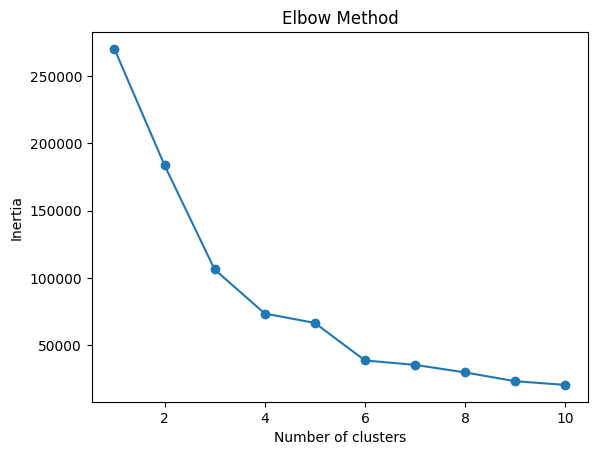

In [8]:

plt.plot(range(1, 11), arr, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

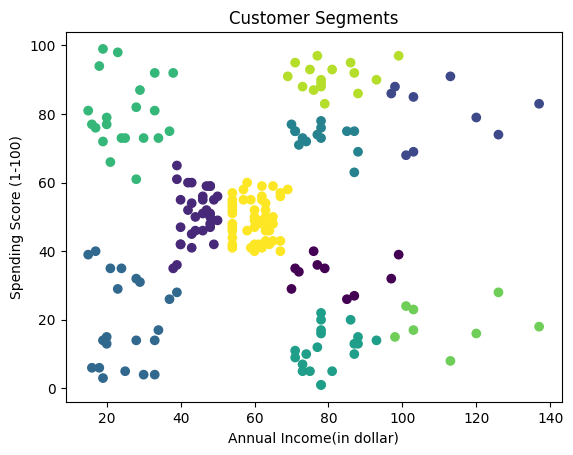

In [9]:
plt.scatter(df['Annual Income(in dollar)'], df['Spending Score (1-100)'], c=df['x_cluster'], cmap='viridis')
plt.title('Customer Segments')
plt.xlabel('Annual Income(in dollar)')
plt.ylabel('Spending Score (1-100)')
plt.show()

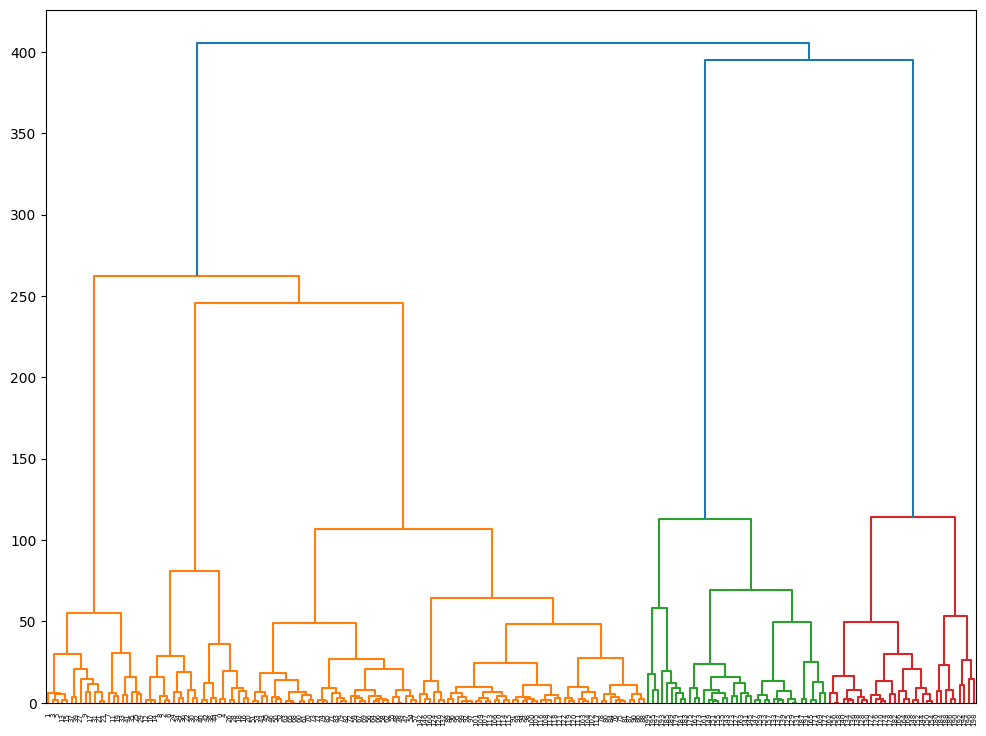

In [14]:
#Model 2 : Hierarchical Clustering
sk = linkage(x, method='ward')
plt.figure(figsize=(12, 9))
dendrogram(sk)
plt.show()

In [19]:
#model 3 : PCA
pc = PCA(n_components=2)
pca_result = pc.fit_transform(x)

df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

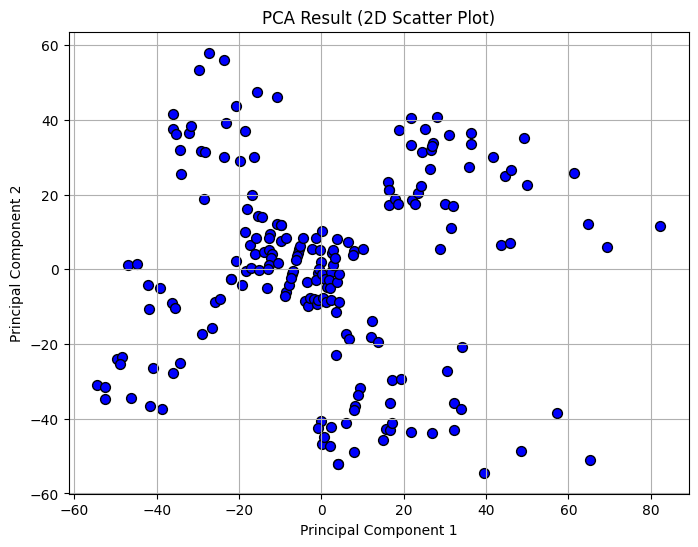

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(df['PCA1'], df['PCA2'], c='blue', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result (2D Scatter Plot)')
plt.grid(True)
plt.show()